In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from glob import glob 
import os
import warnings
warnings.filterwarnings("ignore")


# Importación de la data

In [4]:
df=pd.read_csv('mxmh_survey_results.csv')

# Edades de los entrevistados

In [14]:
y=df.groupby('Age').count().Timestamp # cantidad de respuestas por edad
x=df.groupby('Age').count().reset_index().Age # edades

In [20]:
#Top 10 de frecuencia de respuestas por edad
df.groupby('Age').count().sort_values(by='Timestamp',ascending=False).Timestamp.head(10)

Age
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
20.0    40
22.0    39
23.0    37
26.0    22
25.0    22
Name: Timestamp, dtype: int64

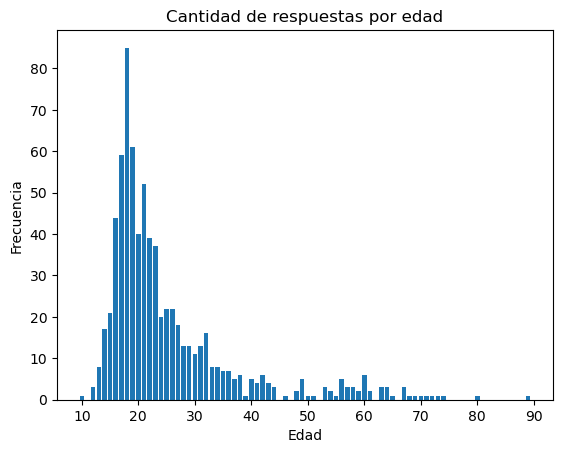

In [22]:
plt.bar(x,y)
plt.title('Cantidad de respuestas por edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# ¿Cuáles son las enfermedades de salud mental más presentes según la edad?


In [23]:
def grupo_etario(x):
    if x<=20:
        return '10-20'
    elif x<=30:
        return '20-30'
    elif x<=40:
        return '30-40'
    elif x<=50:
        return '40-50'
    elif x<=60:
        return '50-60'
    else:
        return '60+'

In [25]:
df['Age_agg']=df.Age.apply(lambda x: grupo_etario(x))

In [29]:
df['n']=1

In [38]:
#Ansiedad
round(df[df.Anxiety>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

Age_agg
10-20    77.9
20-30    81.0
30-40    72.4
40-50    69.2
50-60    30.8
60+      63.6
Name: n, dtype: float64

In [39]:
#Depresión
round(df[df.Depression>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

Age_agg
10-20    58.7
20-30    73.3
30-40    64.5
40-50    57.7
50-60    26.9
60+      40.9
Name: n, dtype: float64

In [42]:
#Insomnio
round(df[df.Insomnia>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

Age_agg
10-20    46.9
20-30    48.2
30-40    55.3
40-50    57.7
50-60    26.9
60+      31.8
Name: n, dtype: float64

In [41]:
#TOC
round(df[df.OCD>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

Age_agg
10-20    33.0
20-30    33.2
30-40    35.5
40-50    23.1
50-60    15.4
60+       9.1
Name: n, dtype: float64

# Género favorito de música mas escuchado 

In [44]:
df['Fav genre'].unique()

array(['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop',
       'Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal',
       'Folk', 'Lofi', 'Gospel'], dtype=object)

In [51]:
aux= round(df.groupby('Fav genre').count()*100/len(df),1)
aux.index

Index(['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz',
       'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock',
       'Video game music'],
      dtype='object', name='Fav genre')

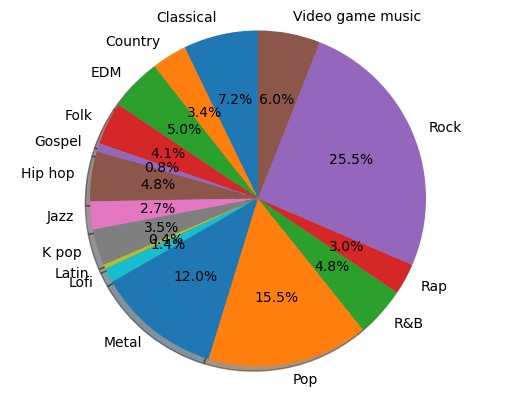

In [52]:
labels = aux.index
sizes = aux.Timestamp
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explode = (0.1, 0, 0, 0)  # resalta la primera porción

# Crear gráfico circular
plt.pie(sizes,  labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Mantiene el gráfico circular

# Mostrar gráfico
plt.show()

In [59]:
aux= df.groupby('Fav genre').count().sort_values(by='Timestamp')
aux.head()

Timestamp  Age  Primary streaming service  Hours per day  \
Fav genre                                                             
Latin              3    3                          3              3   
Gospel             6    6                          6              6   
Lofi              10   10                         10             10   
Jazz              20   20                         20             20   
Rap               22   22                         22             22   

           While working  Instrumentalist  Composer  Exploratory  \
Fav genre                                                          
Latin                  3                3         3            3   
Gospel                 6                6         6            6   
Lofi                  10               10        10           10   
Jazz                  20               20        20           20   
Rap                   22               22        22           22   

           Foreign languages  BPM  ...  Frequency [Rock]  \
Fav genre                          ...                     
Latin                      3    3  ...                 3   
Gospel                     6    4  ...                 6   
Lofi                      10   10  ...                10   
Jazz                      20   19  ...                20   
Rap                       22   20  ...                22   

           Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
Fav genre                                                                     
Latin                                 3        3           3         3    3   
Gospel                                6        6           6         6    6   
Lofi                                 10       10          10        10   10   
Jazz                                 20       20          20        20   20   
Rap                                  22       22          22        22   22   

           Music effects  Permissions  Age_agg   n  
Fav genre                                           
Latin                  2            3        3   3  
Gospel                 6            6        6   6  
Lofi                  10           10       10  10  
Jazz                  20           20       20  20  
Rap                   22           22       22  22  

[5 rows x 34 columns]

<BarContainer object of 16 artists>

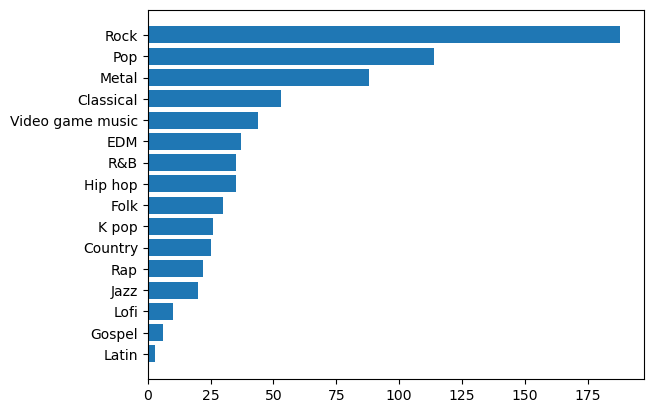

In [60]:
plt.barh(aux.index,aux.Timestamp)

# ¿Sienten que la música tiene algún efecto en la salud mental?

In [61]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Age_agg', 'n'],
      dtype='object')

In [63]:
df['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [65]:
df['Music effects'].isna().sum()

8

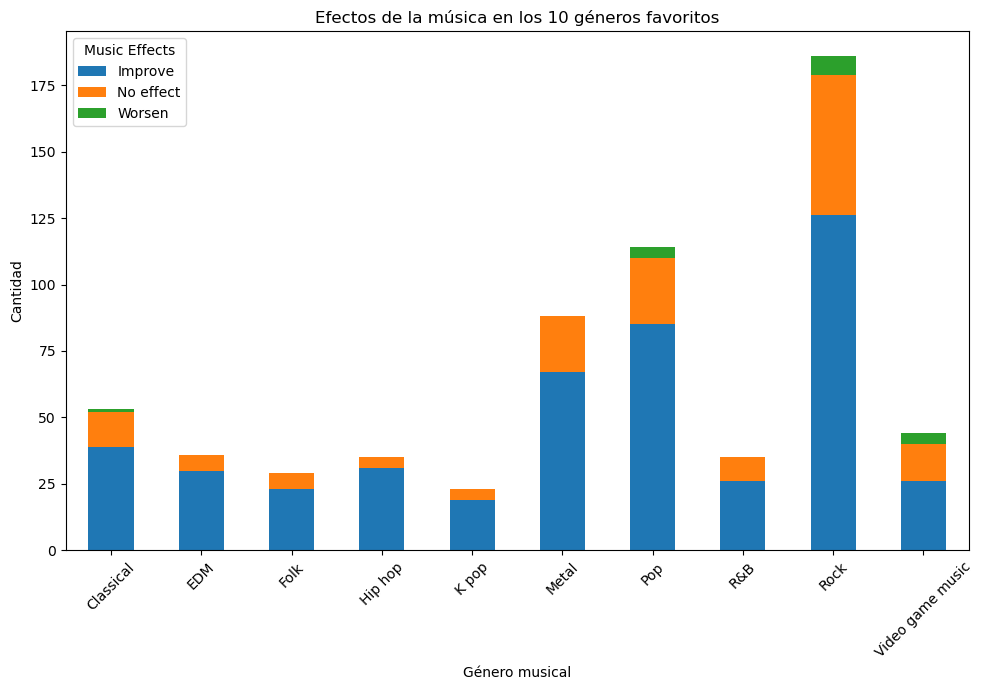

In [67]:
# Filtrar los 10 géneros favoritos
top_10_genres = df['Fav genre'].value_counts().head(10).index

# Filtrar datos por los géneros favoritos
df_filtered = df[df['Fav genre'].isin(top_10_genres)]

# Crear tabla de frecuencia con los efectos de la música por género
genre_effects = pd.crosstab(df_filtered['Fav genre'], df_filtered['Music effects'])

# Graficar gráfico de barras apilado
genre_effects.plot(kind='bar', stacked=True, figsize=(10,7))

# Etiquetas y título
plt.title('Efectos de la música en los 10 géneros favoritos')
plt.xlabel('Género musical')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Music Effects')

# Mostrar gráfico
plt.tight_layout()
plt.show()

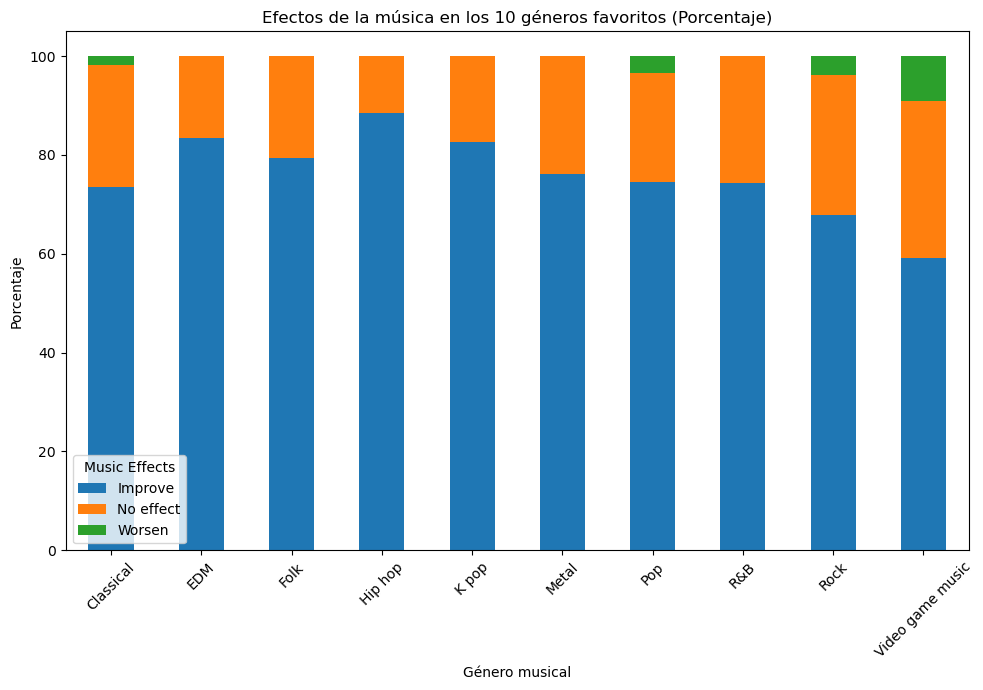

In [69]:
# Filtrar los 10 géneros favoritos
top_10_genres = df['Fav genre'].value_counts().head(10).index

# Filtrar datos por los géneros favoritos
df_filtered = df[df['Fav genre'].isin(top_10_genres)]

# Crear tabla de frecuencia con los efectos de la música por género
genre_effects = pd.crosstab(df_filtered['Fav genre'], df_filtered['Music effects'])

# Convertir a porcentaje
genre_effects_percentage = genre_effects.div(genre_effects.sum(1), axis=0) * 100

# Graficar gráfico de barras apilado con porcentaje
genre_effects_percentage.plot(kind='bar', stacked=True, figsize=(10,7))

# Etiquetas y título
plt.title('Efectos de la música en los 10 géneros favoritos (Porcentaje)')
plt.xlabel('Género musical')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Music Effects')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Existe un patrón en común de escucha de música en aquellos encuestados que tienen/o no tienen algún problema de salud mental

In [72]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Age_agg', 'n'],
      dtype='object')

In [74]:
df[(df.Anxiety==0)&(df.Depression==0)&(df.Insomnia==0)&(df.OCD==0)]

Timestamp   Age          Primary streaming service  \
34    8/28/2022 11:08:51  16.0                            Spotify   
50    8/28/2022 12:37:17  17.0                        Apple Music   
143   8/28/2022 18:17:00  53.0                            Spotify   
465    9/1/2022 15:50:14  16.0                            Spotify   
522     9/2/2022 8:05:59  60.0                            Spotify   
551    9/3/2022 17:14:57  34.0                            Spotify   
586    9/6/2022 14:43:07  23.0  I do not use a streaming service.   
607    9/9/2022 23:34:31  19.0  I do not use a streaming service.   
695   9/28/2022 17:25:48  89.0                            Spotify   
727  10/26/2022 19:45:54  26.0                      YouTube Music   

     Hours per day While working Instrumentalist Composer  Fav genre  \
34             1.0           Yes              No       No  Classical   
50             2.0           Yes             Yes       No        EDM   
143            7.0           Yes              No       No        Pop   
465           10.0            No              No       No       Rock   
522            2.0           Yes              No       No       Rock   
551            3.0           Yes              No       No  Classical   
586           10.0           Yes             Yes      Yes      Metal   
607            0.0            No              No       No  Classical   
695           24.0           Yes             Yes      Yes        Rap   
727            1.0           Yes              No       No      Metal   

    Exploratory Foreign languages  ...  Frequency [Rock]  \
34           No                No  ...             Never   
50          Yes                No  ...   Very frequently   
143         Yes               Yes  ...   Very frequently   
465         Yes                No  ...   Very frequently   
522          No                No  ...   Very frequently   
551          No               Yes  ...         Sometimes   
586          No               Yes  ...         Sometimes   
607         Yes               Yes  ...            Rarely   
695          No                No  ...            Rarely   
727         Yes               Yes  ...             Never   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
34                        Rarely     0.0        0.0      0.0  0.0   
50                        Rarely     0.0        0.0      0.0  0.0   
143                       Rarely     0.0        0.0      0.0  0.0   
465                        Never     0.0        0.0      0.0  0.0   
522                        Never     0.0        0.0      0.0  0.0   
551                    Sometimes     0.0        0.0      0.0  0.0   
586                        Never     0.0        0.0      0.0  0.0   
607                       Rarely     0.0        0.0      0.0  0.0   
695                        Never     0.0        0.0      0.0  0.0   
727                       Rarely     0.0        0.0      0.0  0.0   

    Music effects    Permissions Age_agg  n  
34      No effect  I understand.   10-20  1  
50        Improve  I understand.   10-20  1  
143       Improve  I understand.   50-60  1  
465     No effect  I understand.   10-20  1  
522       Improve  I understand.   50-60  1  
551     No effect  I understand.   30-40  1  
586     No effect  I understand.   20-30  1  
607       Improve  I understand.   10-20  1  
695     No effect  I understand.     60+  1  
727     No effect  I understand.   20-30  1  

[10 rows x 35 columns]

In [76]:
import pandas as pd
import plotly.graph_objects as go

# Cargar datos
df = pd.read_csv('mxmh_survey_results.csv')

# Filtrar datos no nulos en las columnas seleccionadas
df_filtered = df[['While working', 'Music effects']].dropna()

# Crear lista de nodos (unión única de valores de las dos columnas)
all_labels = list(pd.unique(df_filtered['While working'])) + list(pd.unique(df_filtered['Music effects']))

# Mapear los nombres a índices
label_indices = {label: i for i, label in enumerate(all_labels)}

# Crear las fuentes y destinos del diagrama (en términos de índices)
sources = df_filtered['While working'].map(label_indices)
targets = df_filtered['Music effects'].map(label_indices)

# Calcular el peso de cada conexión
link_values = df_filtered.groupby(['While working', 'Music effects']).size().reset_index(name='counts')

# Crear el diagrama de Sankey
fig = go.Figure(go.Sankey(
    node = {
        'pad': 15,
        'thickness': 20,
        'line': {'color': 'black', 'width': 0.5},
        'label': all_labels
    },
    link = {
        'source': link_values['While working'].map(label_indices),
        'target': link_values['Music effects'].map(label_indices),
        'value': link_values['counts']
    }
))

# Configurar el layout
fig.update_layout(title_text='Diagrama de Sankey: "While working" vs "Music effects"', font_size=10)
fig.show()


In [77]:
df['Primary streaming service']['']

0                      Spotify
1                      Pandora
2                      Spotify
3                YouTube Music
4                      Spotify
                ...           
731                    Spotify
732                    Spotify
733    Other streaming service
734                    Spotify
735              YouTube Music
Name: Primary streaming service, Length: 736, dtype: object

In [88]:
df['streaming']= df['Primary streaming service'].str.contains('I do not use a streaming service').apply(lambda x: not x).astype(str)

In [89]:
df

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...  Very frequently            Never   
1                  No  ...           Rarely  Very frequently   
2                 Yes  ...           Rarely           Rarely   
3                 Yes  ...            Never            Never   
4                  No  ...  Very frequently            Never   
..                ...  ...              ...              ...   
731               Yes  ...           Rarely  Very frequently   
732               Yes  ...            Never        Sometimes   
733                No  ...        Sometimes           Rarely   
734                No  ...            Never            Never   
735               Yes  ...  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions streaming  
0             NaN  I understand.      True  
1             NaN  I understand.      True  
2       No effect  I understand.      True  
3         Improve  I understand.      True  
4         Improve  I understand.      True  
..            ...            ...       ...  
731       Improve  I understand.      True  
732       Improve  I understand.      True  
733       Improve  I understand.      True  
734       Improve  I understand.      True  
735       Improve  I understand.      True  

[736 rows x 34 columns]

In [90]:
import pandas as pd
import plotly.graph_objects as go

# Cargar datos
#df = pd.read_csv('mxmh_survey_results.csv')

# Filtrar datos no nulos en las columnas seleccionadas
df_filtered = df[['streaming', 'Music effects']].dropna()

# Crear lista de nodos (unión única de valores de las dos columnas)
all_labels = list(pd.unique(df_filtered['streaming'])) + list(pd.unique(df_filtered['Music effects']))

# Mapear los nombres a índices
label_indices = {label: i for i, label in enumerate(all_labels)}

# Crear las fuentes y destinos del diagrama (en términos de índices)
sources = df_filtered['streaming'].map(label_indices)
targets = df_filtered['Music effects'].map(label_indices)

# Calcular el peso de cada conexión
link_values = df_filtered.groupby(['streaming', 'Music effects']).size().reset_index(name='counts')

# Crear el diagrama de Sankey
fig = go.Figure(go.Sankey(
    node = {
        'pad': 15,
        'thickness': 20,
        'line': {'color': 'black', 'width': 0.5},
        'label': all_labels
    },
    link = {
        'source': link_values['streaming'].map(label_indices),
        'target': link_values['Music effects'].map(label_indices),
        'value': link_values['counts']
    }
))

# Configurar el layout
fig.update_layout(title_text='Diagrama de Sankey: "streaming" vs "Music effects"', font_size=10)
fig.show()


# Escuchar más música influye en sentir menos ansiedad/depresión/etc

In [91]:
df.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...  Very frequently            Never   
1                No  ...           Rarely  Very frequently   
2               Yes  ...           Rarely           Rarely   
3               Yes  ...            Never            Never   
4                No  ...  Very frequently            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                    Sometimes     3.0        0.0      1.0  0.0           NaN   
1                       Rarely     7.0        2.0      2.0  1.0           NaN   
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   

     Permissions streaming  
0  I understand.      True  
1  I understand.      True  
2  I understand.      True  
3  I understand.      True  
4  I understand.      True  

[5 rows x 34 columns]

In [92]:
df['Hours per day'].describe()

count    736.000000
mean       3.572758
std        3.028199
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64

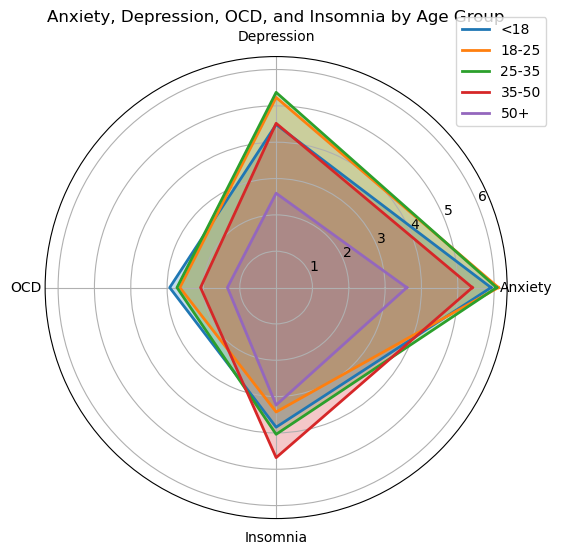

In [93]:

from math import pi


# Agrupar por grupo etario
age_bins = [0, 18, 25, 35, 50, np.inf]  # Definir los límites de los grupos de edad
age_labels = ['<18', '18-25', '25-35', '35-50', '50+']  # Etiquetas para los grupos
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Age Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Age Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Age Group'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Age Group')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Mostrar el gráfico
plt.show()


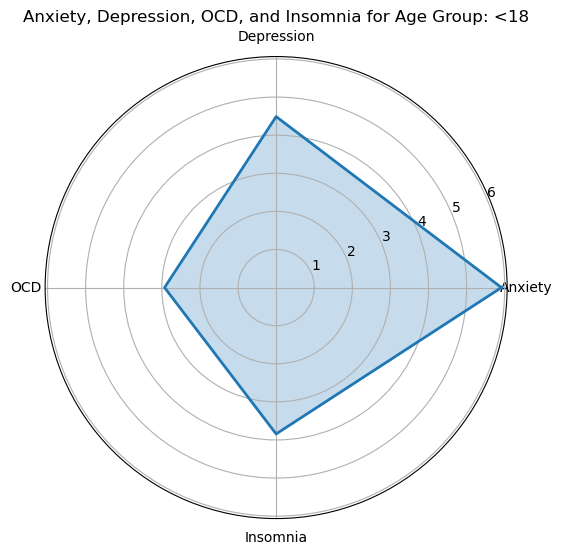

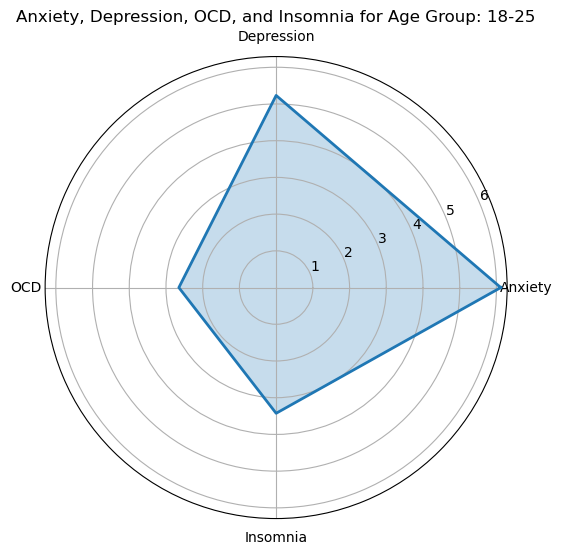

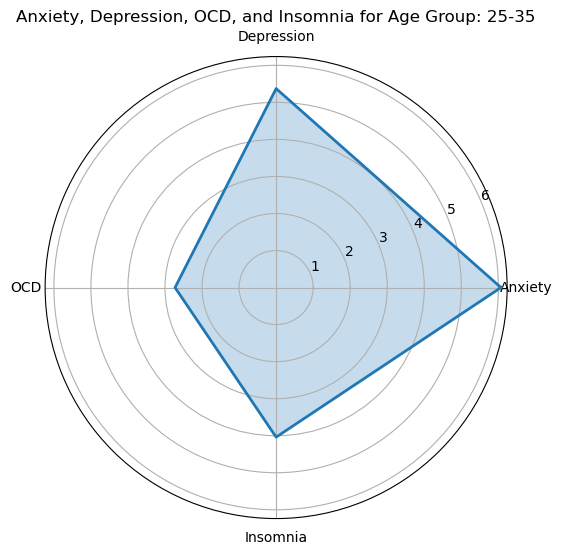

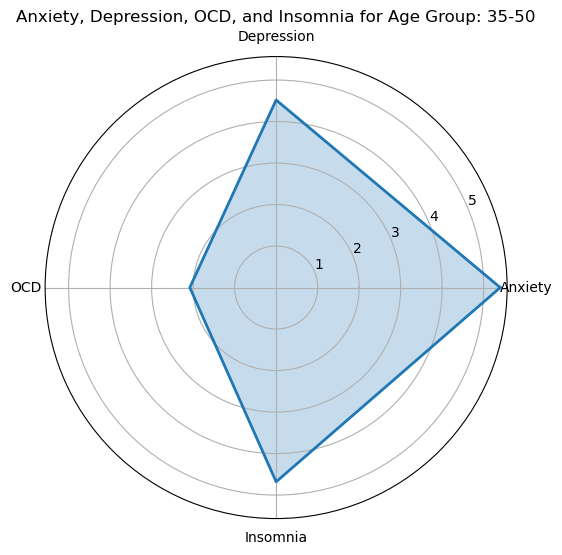

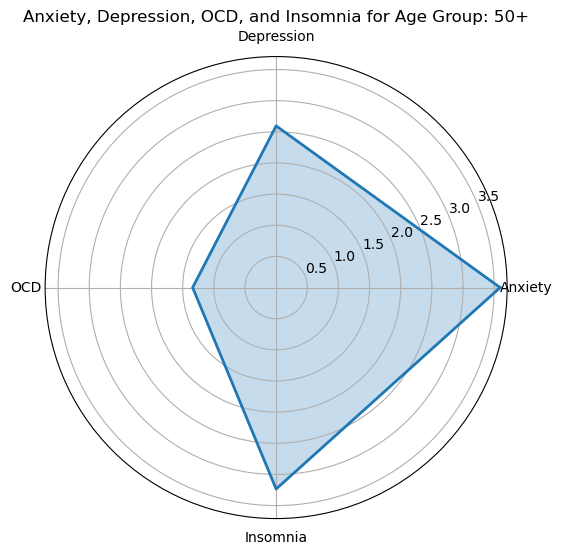

In [95]:

# Agrupar por grupo etario
age_bins = [0, 18, 25, 35, 50, np.inf]  # Definir los límites de los grupos de edad
age_labels = ['<18', '18-25', '25-35', '35-50', '50+']  # Etiquetas para los grupos
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Age Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear un gráfico de radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Age Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Age Group'][i])
    ax.fill(angles, values, alpha=0.25)

    # Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Título y leyenda
    plt.title(f'Anxiety, Depression, OCD, and Insomnia for Age Group: {df_grouped["Age Group"][i]}')
    #plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Mostrar el gráfico
    plt.show()


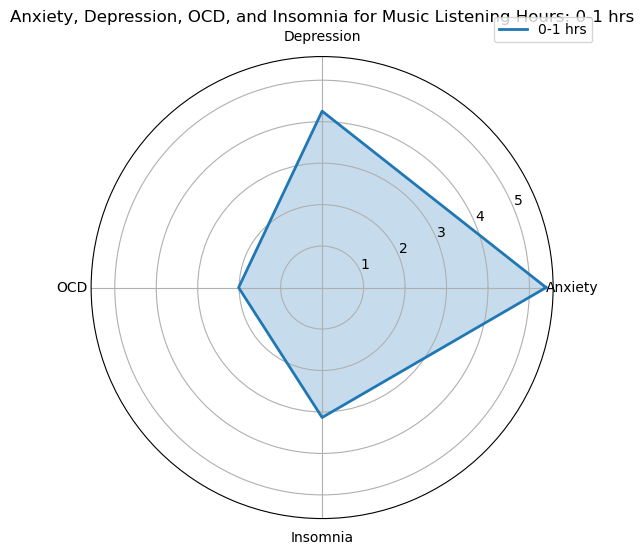

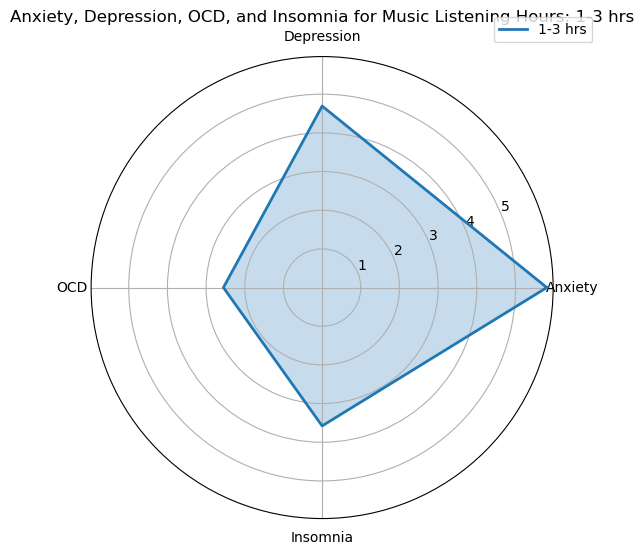

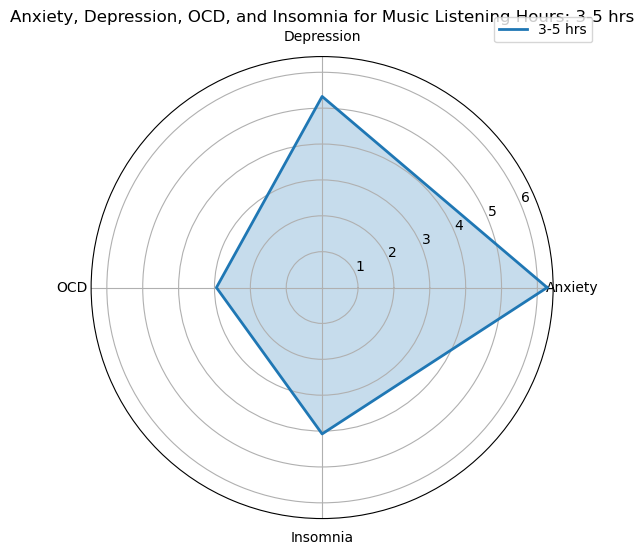

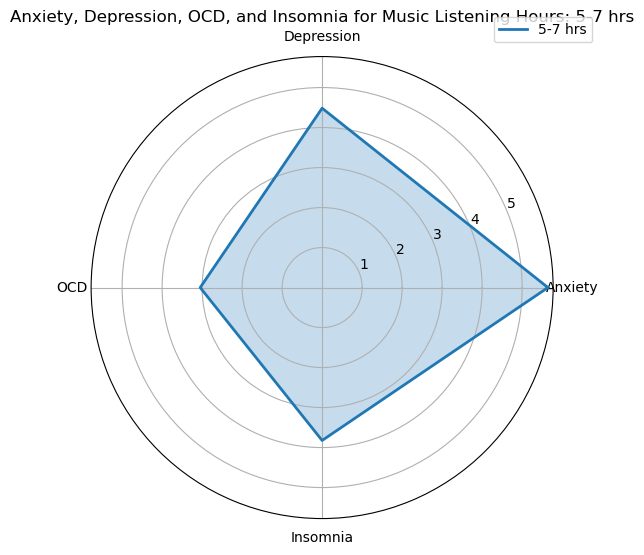

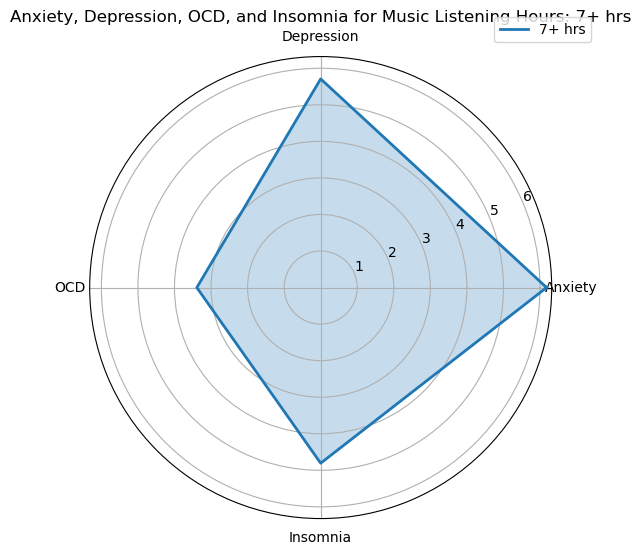

In [96]:

# Agrupar por horas de escucha de música al día
hours_bins = [0, 1, 3, 5, 7, np.inf]  # Definir los límites de las horas de escucha
hours_labels = ['0-1 hrs', '1-3 hrs', '3-5 hrs', '5-7 hrs', '7+ hrs']  # Etiquetas para los grupos
df['Hours Group'] = pd.cut(df['Hours per day'], bins=hours_bins, labels=hours_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo de horas
df_grouped = df.groupby('Hours Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear un gráfico de radar para cada grupo de horas
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Hours Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Hours Group'][i])
    ax.fill(angles, values, alpha=0.25)

    # Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Título y leyenda
    plt.title(f'Anxiety, Depression, OCD, and Insomnia for Music Listening Hours: {df_grouped["Hours Group"][i]}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Mostrar el gráfico
    plt.show()


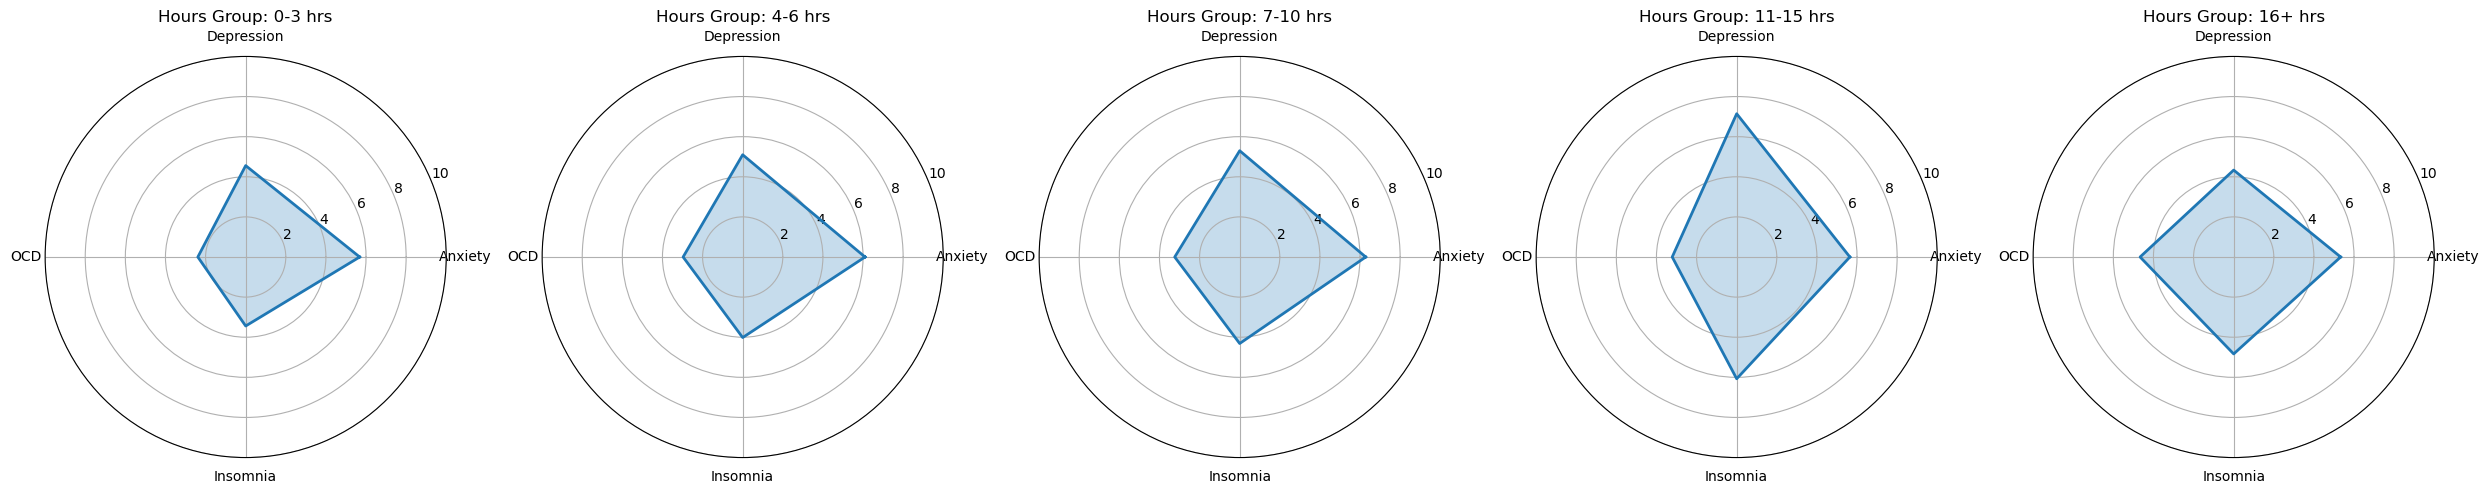

In [100]:


# Cargar datos
df = pd.read_csv('mxmh_survey_results.csv')

# Agrupar por horas de escucha de música al día
hours_bins = [0, 3, 6, 10, 15, np.inf]  # Definir los límites de las horas de escucha
hours_labels = ['0-3 hrs', '4-6 hrs', '7-10 hrs', '11-15 hrs', '16+ hrs']  # Etiquetas para los grupos
df['Hours Group'] = pd.cut(df['Hours per day'], bins=hours_bins, labels=hours_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo de horas
df_grouped = df.groupby('Hours Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear una figura con subgráficas
fig, axs = plt.subplots(1, len(df_grouped), figsize=(25, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo de horas
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Hours Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo

    axs[i].plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Hours Group'][i])
    axs[i].fill(angles, values, alpha=0.25)

    # Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(categories)
    axs[i].set_ylim(0, 10)
    # Título de cada gráfico
    axs[i].set_title(f'Hours Group: {df_grouped["Hours Group"][i]}')

# Ajustar la presentación
plt.tight_layout()
plt.show()


# ¿Cómo se relaciona los BPM de los géneros favoritos de los entrevistados con su salud mental?

In [108]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Hours Group'],
      dtype='object')

In [105]:
df.BPM.max()

999999999.0

In [106]:
df.BPM.mean()

1589948.344992051

In [109]:
df.BPM.corr(df.Anxiety)

-0.02705008014452733

In [110]:
df.BPM.corr(df.Depression)

0.04137116816970303

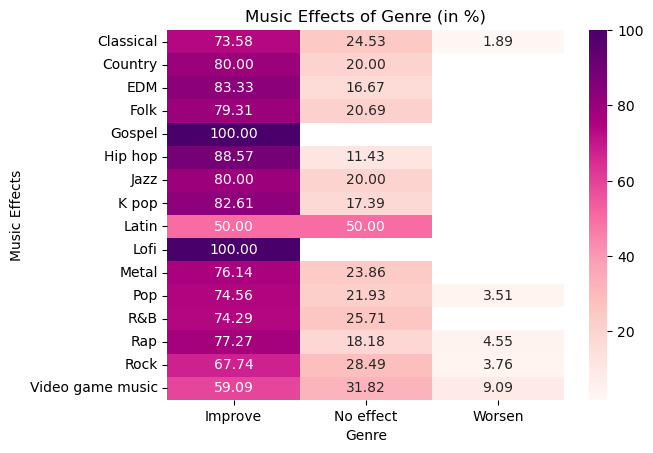

In [112]:
music_effects_per_genre = df.groupby('Fav genre')['Music effects'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_genre, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Music Effects of Genre (in %)")
plt.xlabel("Genre")
plt.ylabel("Music Effects")
plt.show()

In [121]:
def BPM(x):
    if x < 60:
        return 'Slow music (<60 BPM)'
    elif x < 90:
        return 'Moderate music (60-90 BPM)'
    elif x < 120:
        return 'Energetic music (90-120 BPM)'
    elif x < 140:
        return 'Active music (120-140 BPM)'
    else:
        return 'Faster music (>140 BPM)'

In [122]:
df['Tipo de Musica']=df.BPM.apply(BPM)

In [118]:
df.groupby(['Tipo de Musica']).count()

Timestamp  Age  Primary streaming service  Hours per day  \
Tipo de Musica                                                                
Música activa            151  151                        151            151   
Música enérgetica        194  194                        194            194   
Música lenta              11   11                         11             11   
Música moderada           81   81                         80             81   
Música muy rápida        299  298                        299            299   

                   While working  Instrumentalist  Composer  Fav genre  \
Tipo de Musica                                                           
Música activa                151              150       151        151   
Música enérgetica            194              194       194        194   
Música lenta                  11               11        11         11   
Música moderada               81               79        81         81   
Música muy rápida            296              298       298        299   

                   Exploratory  Foreign languages  ...  Frequency [Rap]  \
Tipo de Musica                                     ...                    
Música activa              151                150  ...              151   
Música enérgetica          194                193  ...              194   
Música lenta                11                 11  ...               11   
Música moderada             81                 81  ...               81   
Música muy rápida          299                297  ...              299   

                   Frequency [Rock]  Frequency [Video game music]  Anxiety  \
Tipo de Musica                                                               
Música activa                   151                           151      151   
Música enérgetica               194                           194      194   
Música lenta                     11                            11       11   
Música moderada                  81                            81       81   
Música muy rápida               299                           299      299   

                   Depression  Insomnia  OCD  Music effects  Permissions  \
Tipo de Musica                                                             
Música activa             151       151  151            150          151   
Música enérgetica         194       194  194            191          194   
Música lenta               11        11   11             11           11   
Música moderada            81        81   81             81           81   
Música muy rápida         299       299  299            295          299   

                   Hours Group  
Tipo de Musica                  
Música activa              151  
Música enérgetica          193  
Música lenta                10  
Música moderada             80  
Música muy rápida          296  

[5 rows x 34 columns]

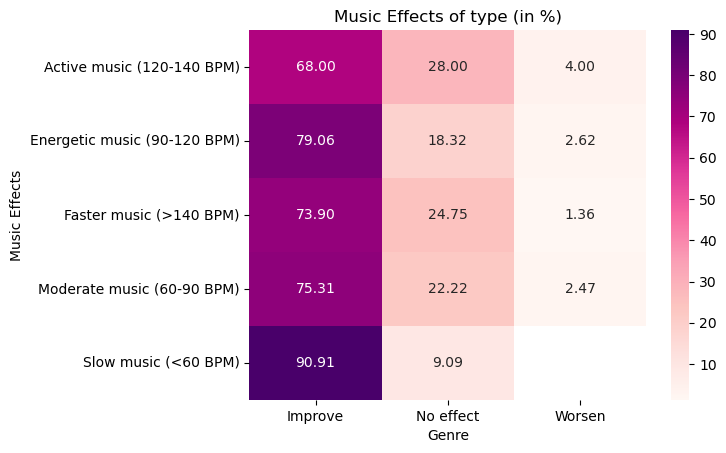

In [124]:
music_effects_per_bpm = df.groupby('Tipo de Musica')['Music effects'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_bpm, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Music Effects of type (in %)")
plt.xlabel("Genre")
plt.ylabel("Music Effects")
plt.show()

# Relación entre los BPM del genero favorito y el insomnio

In [125]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Hours Group', 'Tipo de Musica'],
      dtype='object')

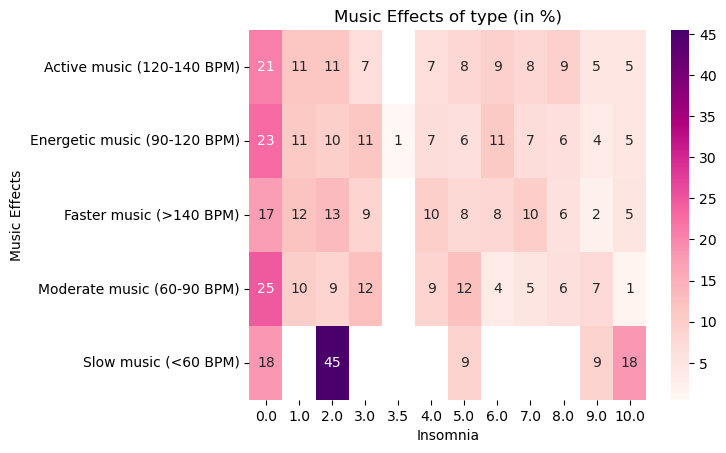

In [128]:
music_effects_per_bpm = df.groupby('Tipo de Musica')['Insomnia'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_bpm, annot=True, fmt=".0f", cmap="RdPu")
plt.title("Music Effects of type (in %)")
plt.xlabel("Insomnia")
plt.ylabel("Music Effects")
plt.show()

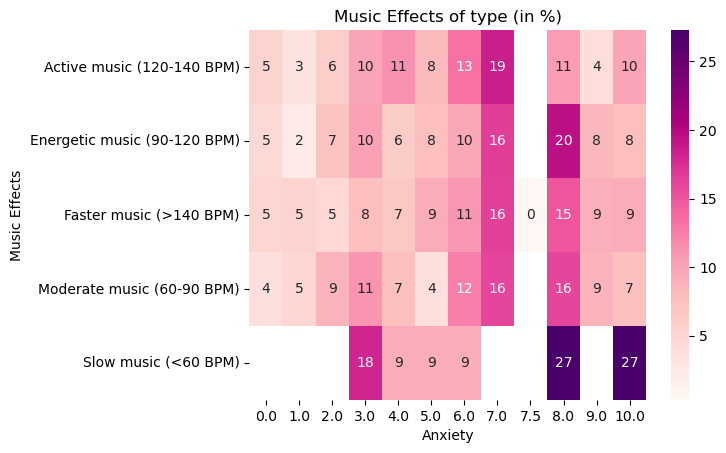

In [130]:
music_effects_per_bpm = df.groupby('Tipo de Musica')['Anxiety'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_bpm, annot=True, fmt=".0f", cmap="RdPu")
plt.title("Music Effects of type (in %)")
plt.xlabel("Anxiety")
plt.ylabel("Music Effects")
plt.show()

In [131]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Hours Group', 'Tipo de Musica'],
      dtype='object')

In [ ]:
# ¿Cómo influye la frecuencia de escucha de diferentes géneros musicales en distintos aspectos de la salud mental? como relajación, motivación, o ansiedad

In [ ]:
[ 'Frequency [Classical]','Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Hours Group', 'Tipo de Musica']

In [137]:
df['Frequency [Classical]'].unique()

['<18', '50+', '18-25', NaN, '25-35', '35-50']
Categories (5, object): ['<18' < '18-25' < '25-35' < '35-50' < '50+']

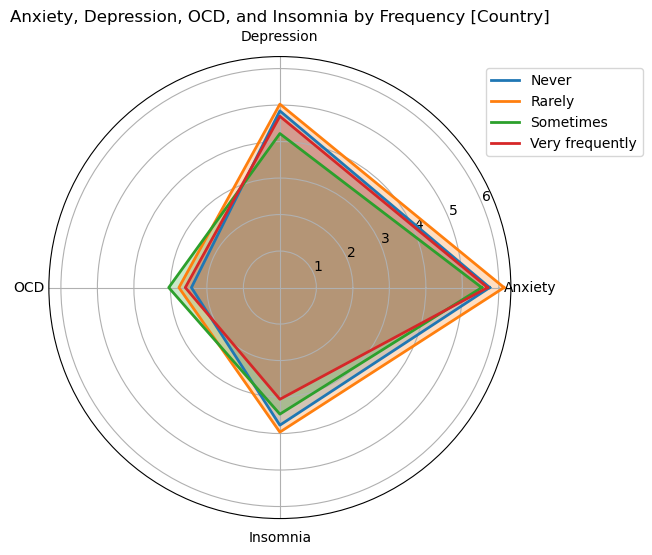

In [149]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Country]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Country]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Country]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Country]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


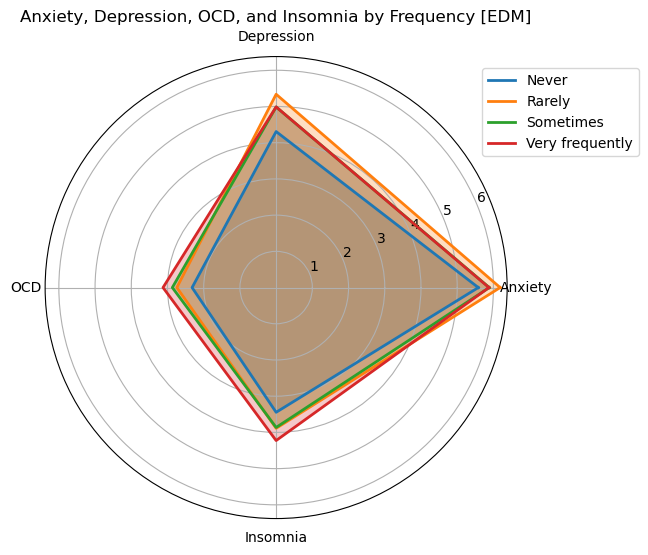

In [148]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [EDM]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [EDM]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [EDM]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [EDM]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


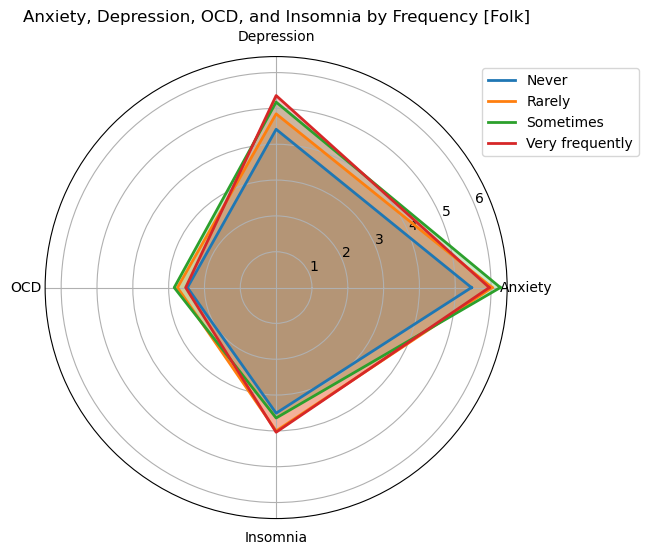

In [150]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Folk]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Folk]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Folk]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Folk]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


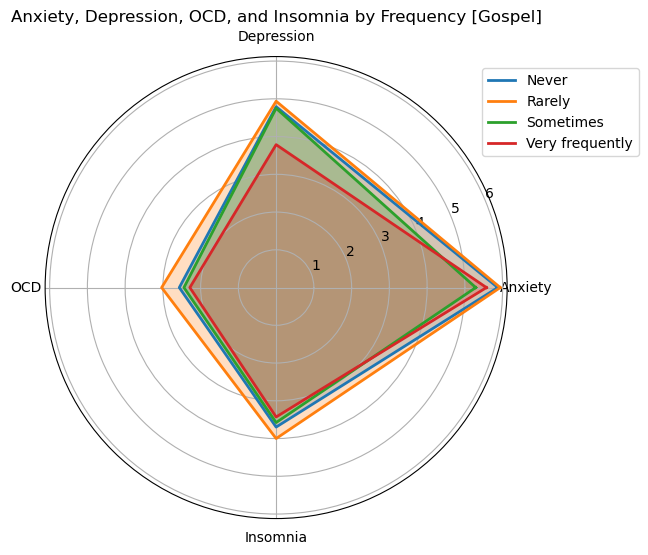

In [151]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Gospel]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Gospel]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Gospel]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Gospel]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


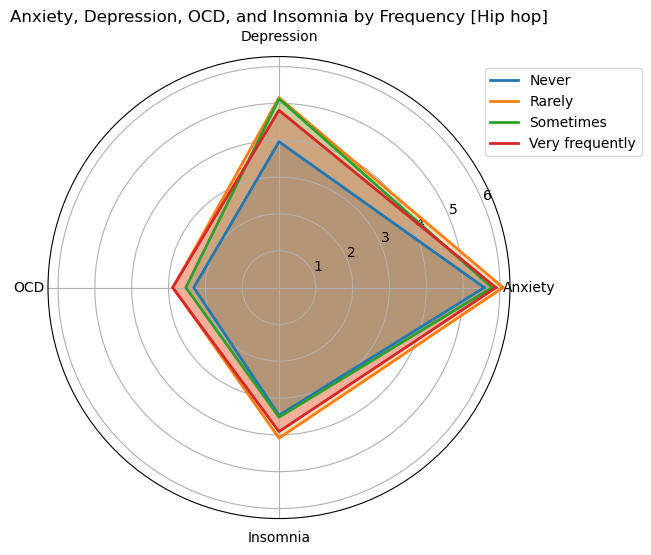

In [152]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Hip hop]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Hip hop]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Hip hop]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Hip hop]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Hip hop]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Hip hop]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Hip hop]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Hip hop]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


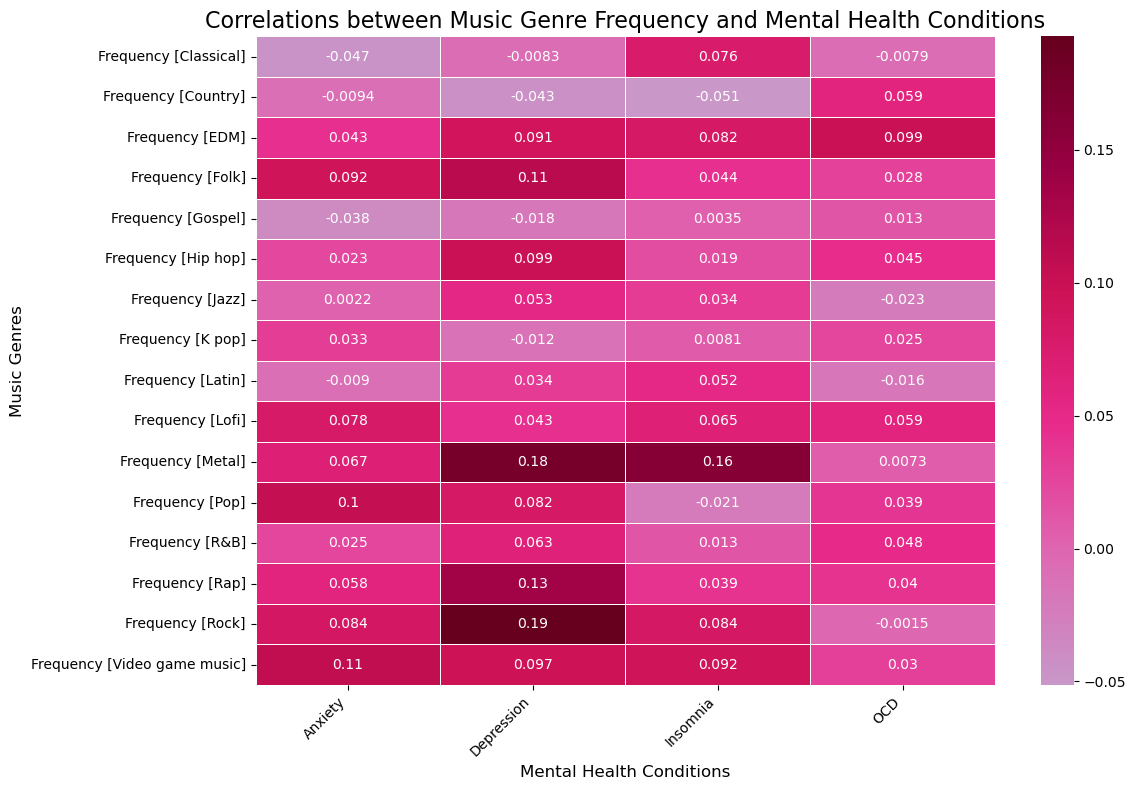

In [154]:


# Cargar los datos del archivo CSV (asegúrate de tener el dataset en el directorio adecuado)
df = pd.read_csv('mxmh_survey_results.csv')

# Definir las columnas de frecuencias de géneros musicales
frequencies_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Definir las columnas de resultados de salud mental
mental_health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Convertir las categorías de frecuencia en valores numéricos
frequency_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

# Aplicar el mapeo a las columnas de frecuencias
for col in frequencies_cols:
    df[col] = df[col].map(frequency_map)

# Calcular las correlaciones entre las frecuencias de géneros musicales y los resultados de salud mental
correlations = df[frequencies_cols + mental_health_cols].corr()

# Filtrar solo las correlaciones de los géneros con las condiciones de salud mental
correlations_health = correlations.loc[frequencies_cols, mental_health_cols]

# Crear un heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlations_health, annot=True, cmap='PuRd', center=0, linewidths=.5)

# Configurar etiquetas y título del gráfico
plt.title('Correlations between Music Genre Frequency and Mental Health Conditions', fontsize=16)
plt.xlabel('Mental Health Conditions', fontsize=12)
plt.ylabel('Music Genres', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()